


# 1. Importing Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
bank = pd.read_csv('bank-full.csv')

# 2. Data Preprocessing

- 1. yes,no를 각각 1,0으로 바꿔준다
- 2. 'education' feature에 있는 category 변수들: 1학년,2학년,3학년 -> 1,2,3으로 바꿔준다 ( 본질은 연속형 변수이므로 )

In [6]:
bank.replace(('yes','no'),(1,0),inplace=True)
bank['education'].replace(('secondary','tertiary','primary','unknown'),(2,3,1,2),inplace=True)

In [7]:
cat_features = bank.select_dtypes(include=['object']).axes[1]

In [8]:
cat_features

Index(['job', 'marital', 'contact', 'month', 'poutcome'], dtype='object')

- 3. category 변수들을 dummy 변수로 바꿔준다

In [9]:
# 더미화
def merge_dummy_data(data, cat_features):
    for cat_feature in cat_features:
        tmp = pd.get_dummies(data[cat_feature], prefix=cat_feature, drop_first=True)
        
        data = pd.concat([data, tmp], 1)
    data = data.drop(cat_features, 1)       
    return data

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,2,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,2,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [70]:
bank[bank.y==1]['balance'].describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [11]:
dummied_data = merge_dummy_data(bank, cat_features)

In [12]:
dummied_data.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [13]:
dummied_data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,261,1,-1,...,0,0,0,1,0,0,0,0,0,1
1,44,2,0,29,1,0,5,151,1,-1,...,0,0,0,1,0,0,0,0,0,1
2,33,2,0,2,1,1,5,76,1,-1,...,0,0,0,1,0,0,0,0,0,1
3,47,2,0,1506,1,0,5,92,1,-1,...,0,0,0,1,0,0,0,0,0,1
4,33,2,0,1,0,0,5,198,1,-1,...,0,0,0,1,0,0,0,0,0,1


- 4. feature들의 분포를 표준정규분포로 바꿔준다 ( Standard Scaling ) -> 더 높은 성능

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

def scalingcolumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame( sc.fit_transform(pd.DataFrame(df[col])),columns=[col] )
    return df

In [16]:
cols_to_scale = dummied_data.columns[0:11]
scaled_data = scalingcolumns(dummied_data,cols_to_scale)

In [17]:
scaled_data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,1.314507,-0.13549,0.256419,0.893915,-0.436803,-1.298476,0.011016,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,-0.218740,-0.13549,-0.437895,0.893915,-0.436803,-1.298476,-0.416127,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,-0.218740,-0.13549,-0.446762,0.893915,2.289359,-1.298476,-0.707361,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,-0.218740,-0.13549,0.047205,0.893915,-0.436803,-1.298476,-0.645231,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,-0.218740,-0.13549,-0.447091,-1.118674,-0.436803,-1.298476,-0.233620,-0.569351,-0.411453,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X = scaled_data[list(set(scaled_data.columns)-set('y'))]
y = scaled_data['y']

In [ ]:
X.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

- 5. train & test를 70% : 30%로 나눠준다

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Modeling

## 수업 때 배운 모델 1) ~ 3)
>#### 1) KNN
>#### 2) NaiveBayes
>#### 3) Decision Tree

## 성능 좋은 모델 4)~6)
>#### 4) Random Forest
>#### 5) XGBoost
>#### 6) LightGBM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier 

# (1) parameter tuning 이전

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
names = ['KNN','NB','DT','RF','XGBoost','LGBM']

clf_list = [KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(random_state=42),
            RandomForestClassifier(random_state=42),LGBMClassifier(random_state=42),XGBClassifier(random_state=42)]

pretuning_acc = []
for name, clf in zip(names, clf_list):
    print(name)
    pretuning = cross_val_score(clf, X_train, y_train, scoring='accuracy',cv=5).mean()
    pretuning_acc.append(pretuning)
    print('Accuracy : ', pretuning.round(3))
    print('###################################')

## (2) parameter tuning 이후
- KNN : by GridSearch
- Naive Bayes : parameter가 존재하지 않는다
- DecisionTree, RandomForest, XGBoost, LightGBM : by Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def hypertuning_gscv(est, p_distr,X,y):
    #gdsearch = GridSearchCV(est, param_grid=p_distr, n_jobs=-1, cv=5)
    gdsearch = GridSearchCV(est, param_grid=p_distr, cv=5)
    gdsearch.fit(X,y)
    bt_param = gdsearch.best_params_
    bt_score = gdsearch.best_score_    
    return bt_param, bt_score

knn_params = {'n_neighbors':[5,7,9,11]},

params_list1 = [knn_params]

best_param_list1 = []

names1 = ['KNN']
clf_list1 = [KNeighborsClassifier()]

posttuning_acc = []

for name, clf, param_list in zip(names1, clf_list1, params_list1):
    print(name)
    best_params = hypertuning_gscv(clf, param_list, X_train, y_train)
    best_param_list1.append(best_params[0])
    print(best_params[0])
    clf.set_params(**best_params[0])
    posttuned = cross_val_score(clf, X_train, y_train, scoring='accuracy',cv=5).mean()
    posttuning_acc.append(posttuned)
    print('Accuarcy : ', posttuned.round(3))
    print('##########################################################')

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    #rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_jobs=-1, n_iter=nbr_iter, cv=5, scoring='accuracy', random_state=42)
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr, n_iter=nbr_iter, cv=5, scoring='accuracy', random_state=42)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

dt_params = {'max_depth':np.arange(4, 15), 
            'min_samples_split':np.arange(2, 10)}

rf_params = {'max_depth':np.arange(5, 30), 
            'n_estimators':np.arange(100, 200)}
            #'min_samples_split':np.arange(3, 10)}

xgb_params = {'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 0,3],
        #'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        #'gamma': [0, 0.25, 0.5, 1.0],
        #'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

lgbm_params ={'max_depth': np.arange(3, 30),
             'num_leaves': np.arange(10, 50), 
             'learning_rate': [ 0.01, 0.03, 0.05],
             #'min_child_samples': randint(2, 30),
             #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             #'subsample': np.linspace(0.6, 0.9, 30, endpoint=True), 
             #'colsample_bytree': np.linspace(0.1, 0.8, 100, endpoint=True),
             #'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             #'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'n_estimators': np.arange(100, 200)}

params_list2 = [dt_params, rf_params,xgb_params, lgbm_params]

best_param_list2 = []

names2 = ['DT','RF','XGBoost','LGBM']
clf_list2 = [DecisionTreeClassifier(), RandomForestClassifier(),XGBClassifier(),LGBMClassifier()]

posttuning_acc2 = []

for name, clf, param_list in zip(names2, clf_list2, params_list2):
    print(name)
    best_params = hypertuning_rscv(clf, param_list, 30, X_train, y_train)
    best_param_list2.append(best_params[0])
    print(best_params[0])
    clf.set_params(**best_params[0])
    posttuned2 = cross_val_score(clf, X_train, y_train, scoring='accuracy',cv=5).mean()
    posttuning_acc2.append(posttuned2)
    print('Accuarcy : ', posttuned2.round(3))
    print('##########################################################')


# 4.Result

In [ ]:
pre_accuracy = pretuning_acc.copy()
post_accuracy = posttuning_acc.copy()

In [ ]:
pre_accuracy

In [ ]:
post_accuracy.append(pretuning_acc[1]) 
post_accuracy = post_accuracy + posttuning_acc2

In [ ]:
post_accuracy

In [ ]:
acc = {'Pre_tuning':pre_accuracy, 'Post_tuning':post_accuracy} 
accdf = pd.DataFrame(acc, index =['KNN', 'NaiveBayes','DecisionTree', 'RandomForest', 'XGBoost','LightGBM']) 

In [ ]:
accdf = accdf[['Pre_tuning','Post_tuning']]

### 결론 : 다른 모델들(KNN,NB,DT,RF) 보다도, XGBoost, LightGBM이 가장 좋은 성능을 보였다!

In [ ]:
accdf.round(3)

# 5.Visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
accdf.plot(kind='bar')
plt.title('Accuarcy Comparison')
plt.xticks(rotation=45)
plt.xlabel('Model')
plt.ylabel('Accuarcy')
plt.ylim(0.83,0.92)

In [ ]:
best_param_list2[3]

In [ ]:
lgb_model = LGBMClassifier(**best_param_list2[3])
lgb_model.fit(X_train,y_train)

In [ ]:
import shap
import skimage

explainer = shap.TreeExplainer(lgb_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
# 중요도 파악
# (영향의 정도 ( 절대값! 긍,부정 무시하고 ) )
shap.summary_plot(shap_values, X_test, plot_type = 'bar')

In [ ]:
shap_values[0][0]

In [ ]:
X_test.iloc[0,:]

# Confusion Matrix

In [ ]:
lgb_model = LGBMClassifier(**{'num_leaves': 49, 'n_estimators': 146, 'max_depth': 29, 'learning_rate': 0.05})
lgb_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
train_pred = lgb_model.predict(X_train)
test_pred = lgb_model.predict(X_test)

In [ ]:
confusion_matrix(y_train,train_pred)

In [ ]:
accuracy_score(y_train,train_pred).round(3)

In [ ]:
confusion_matrix(y_test,test_pred)

In [ ]:
accuracy_score(y_test,test_pred).round(3)

## Neural Net with TF2

### (1) data preprocessing

In [18]:
train_nn = scaled_data.sample(frac=0.7,random_state=0)
test_nn = scaled_data.drop(train_nn.index)

In [19]:
train_labels = train_nn.pop('y')
test_labels = test_nn.pop('y')

### (2) modeling

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

%load_ext tensorboard
%matplotlib inline

In [21]:
import os
from glob import glob
from datetime import datetime

In [53]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(train_nn.keys())]),
        layers.BatchNormalization(),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
        ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [74]:
model = build_model()

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1312      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 1,713
Trainable params: 1,649
Non-trainable params: 64
_________________________________________________________________


### (3) callbacks

In [76]:
#logdir = os.path.join('logs',  datetime.now().strftime("%Y%m%d-%H%M%S"))

In [77]:
#%tensorboard --logdir logs --port 8008

In [78]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
        print('.', end='')

In [79]:
EPOCHS = 150

history = model.fit(
    train_nn, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,batch_size=64,
    callbacks=[PrintDot()])


....................................................................................................
..................................................

In [82]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,accuracy,loss,val_accuracy,val_loss,epoch
145,0.914290,0.186893,0.902212,0.237657,145
146,0.912355,0.190484,0.904265,0.231339,146
147,0.912908,0.189448,0.902528,0.227458,147
148,0.912671,0.189554,0.900632,0.237001,148
149,0.912039,0.193783,0.901264,0.239322,149


In [87]:
hist.tail(1).iloc[:,[0,2]].round(3)

,accuracy,val_accuracy
149,0.912,0.901


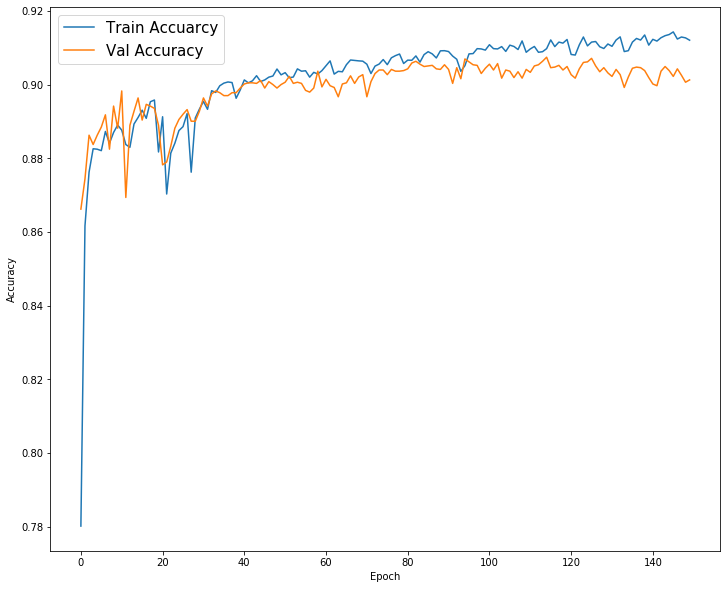

In [91]:
def plot_history(history):
      hist = pd.DataFrame(history.history)
      hist['epoch'] = history.epoch

      plt.figure(figsize=(12,10))

      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.plot(hist['epoch'], hist['accuracy'],
               label='Train Accuarcy')
      plt.plot(hist['epoch'], hist['val_accuracy'],
               label = 'Val Accuracy')
      plt.legend(fontsize=15)
      plt.show()

plot_history(history)